# TODO: Add a cool Title here

## 1. Briefing

|            |          |                     |
|------------|----------|---------------------|
| Subject    |          | Machine Learning    |
| Supervisor |          | Prof. Aswin Kannan  |
|            |          |                     |
| Team Name  |          | MT2025724_MT2025732 |
| Member 1   | Name:    | Shreg               |
|            | Roll No: | MT2025724           |
| Member 2   | Name:    | Anisha              |
|            | Roll No: | MT2025732           |
|            |          |                     |

TODO: Add some numericals like the number of models compared, number of data processing techniques applied...

### Keywords

## 2. Summary

* 4–8 bullet points summarizing highest-level conclusions (best model(s), tradeoffs, recommended next steps).
* Short comparative table of winners by criteria (accuracy, latency, model size, fairness, etc.)

## 3. Introduction

* Problem statement and motivation
* Objectives of the comparative study (what questions you will answer)
* Scope (datasets, model families, compute constraints)
* Contributions (what unique analyses you provide — e.g., timing, memory profiling, calibration, fairness tests)


In [82]:
# Notification system for slow steps - I multitask, so a ping really helps when long steps are completed to bring back my attention.
# Remember, _attention is all you need_! xD
import chime

# The universe loves chaos, but reproducibility doesn’t.
# Imported mainly to set seed for other libraries which depend on it.
import random

# Because time waits for no one, but at least we can measure how fast it runs away.
import time

# Metadata serialization
# Question for you, what's the difference between JS and JSON?
import json

# Big fan of java's streams. A programmer who cant make an easy task difficult, is not a programmer!
import functools, itertools

# The Swiss army knife of data
import pandas as pd

# Where math meets meth
import numpy as np

import scipy as sp

# Bag of all ML models
import sklearn as skl
import xgboost as xgb

# An artist bringing data to life
import matplotlib.pyplot as plt

# The artist's wardrobe
import matplotlib as mpl

# Pyplot's quirkier cousin
import seaborn as sns

# Never going to use it, but make me feel prepared
from pprint import pprint

# If I can’t see it moving, it’s not working.
from tqdm import tqdm

In [2]:
chime.theme("material")
chime.info()

In [3]:
for option in ['../../data/ait-511-course-project-1-obesity-risk/train.csv', 'train.csv', 'data/train.csv']:
    try:
        ds_source = pd.read_csv(option)
        print('Training data found at', option)
        ds_test = pd.read_csv(option.replace('train.csv', 'test.csv'))
        break
    except:
        print('No training data found at', option)

try:
    ds_source
except NameError:
    print('No training data found anywhere')

chime.info()

Training data found at ../../data/ait-511-course-project-1-obesity-risk/train.csv


In [4]:
ds_source.shape

(15533, 18)

In [5]:
ds_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15533 entries, 0 to 15532
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15533 non-null  int64  
 1   Gender                          15533 non-null  object 
 2   Age                             15533 non-null  float64
 3   Height                          15533 non-null  float64
 4   Weight                          15533 non-null  float64
 5   family_history_with_overweight  15533 non-null  object 
 6   FAVC                            15533 non-null  object 
 7   FCVC                            15533 non-null  float64
 8   NCP                             15533 non-null  float64
 9   CAEC                            15533 non-null  object 
 10  SMOKE                           15533 non-null  object 
 11  CH2O                            15533 non-null  float64
 12  SCC                             

In [6]:
ds_source.head(5)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,WeightCategory
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [7]:
ds_source.describe(include='all')

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,WeightCategory
count,15533.000000,15533,15533.000000,15533.000000,15533.000000,15533,15533,15533.000000,15533.000000,15533,15533,15533.000000,15533,15533.000000,15533.000000,15533,15533,15533
unique,NaN,2,NaN,NaN,NaN,2,2,NaN,NaN,4,2,NaN,2,NaN,NaN,3,5,7
top,NaN,Male,NaN,NaN,NaN,yes,yes,NaN,NaN,Sometimes,no,NaN,no,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_III
freq,NaN,7783,NaN,NaN,NaN,12696,14184,NaN,NaN,13126,15356,NaN,15019,NaN,NaN,11285,12470,2983
mean,7766.000000,NaN,23.816308,1.699918,87.785225,NaN,NaN,2.442917,2.760425,NaN,NaN,2.027626,NaN,0.976968,0.613813,NaN,NaN,NaN
std,4484.135201,NaN,5.663167,0.087670,26.369144,NaN,NaN,0.530895,0.706463,NaN,NaN,0.607733,NaN,0.836841,0.602223,NaN,NaN,NaN
min,0.000000,NaN,14.000000,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,3883.000000,NaN,20.000000,1.630927,66.000000,NaN,NaN,2.000000,3.000000,NaN,NaN,1.796257,NaN,0.007050,0.000000,NaN,NaN,NaN
50%,7766.000000,NaN,22.771612,1.700000,84.000000,NaN,NaN,2.342220,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.566353,NaN,NaN,NaN
75%,11649.000000,NaN,26.000000,1.762921,111.600553,NaN,NaN,3.000000,3.000000,NaN,NaN,2.531456,NaN,1.582675,1.000000,NaN,NaN,NaN


In [8]:
dropable_features = ['id', 'WeightCategory']
binary_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
multi_cat_features = ['CAEC', 'CALC', 'MTRANS']
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

labels = ds_source['WeightCategory'].unique()
labels_encoder = {label: index for index, label in enumerate(labels)}
labels_decoder = {index: label for index, label in enumerate(labels)}

## Missing Value

In [9]:
ds_source.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
WeightCategory                    0
dtype: int64

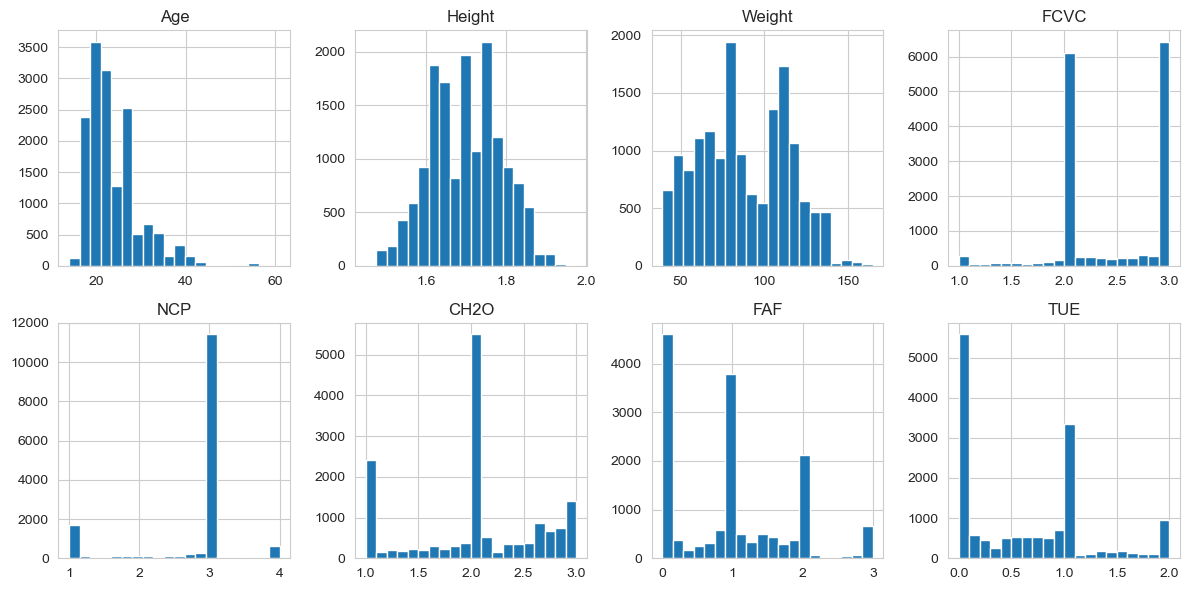

In [10]:
ds_source[numerical_features].hist(bins=20, figsize=(12, 6), layout=(2, -1))
plt.tight_layout()
plt.show()

123

(array([2412.,  172.,  261.,  167.,  273.,  244.,  250.,  263.,  275.,
        5524.,  463.,  400.,  248.,  290.,  368.,  540.,  791.,  484.,
         713., 1395.]),
 array([0.        , 0.1109226 , 0.2218452 , 0.3327678 , 0.44369039,
        0.55461299, 0.66553559, 0.77645819, 0.88738079, 0.99830339,
        1.10922598, 1.22014858, 1.33107118, 1.44199378, 1.55291638,
        1.66383898, 1.77476157, 1.88568417, 1.99660677, 2.10752937,
        2.21845197]),
 <BarContainer object of 20 artists>)

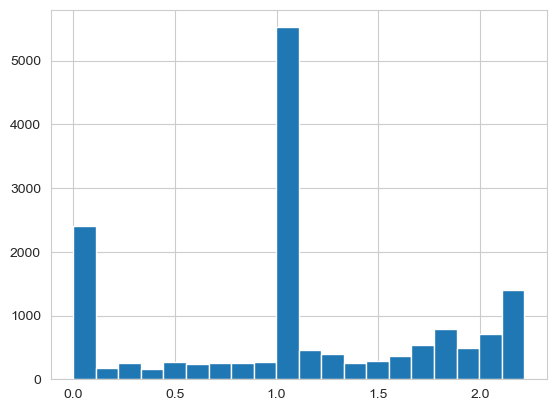

In [11]:
plt.hist(sp.stats.boxcox(ds_source['CH2O'])[0], bins=20)

<Axes: xlabel='WeightCategory', ylabel='CH2O'>

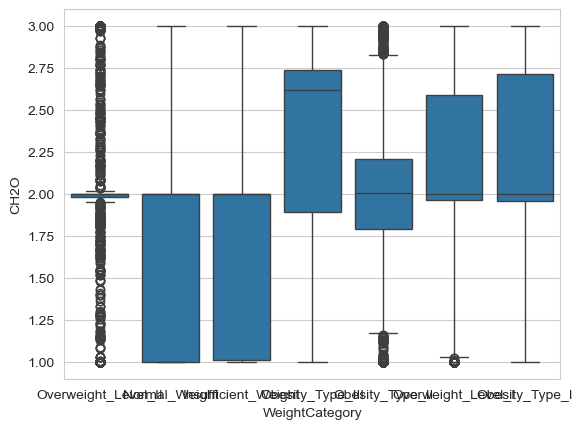

In [12]:
sns.boxplot(x='WeightCategory', y='CH2O', data=ds_source)

<Axes: xlabel='Age', ylabel='Count'>

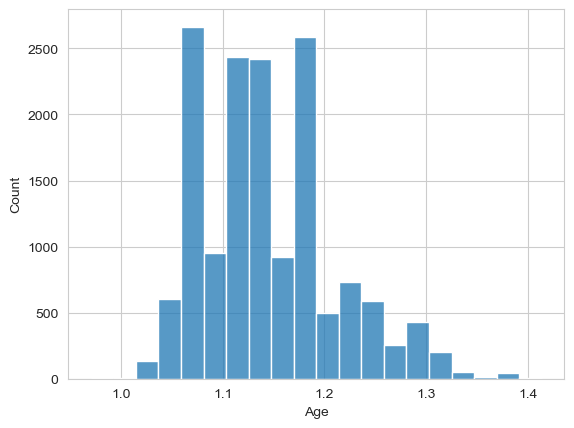

In [13]:
sns.histplot(np.log(np.log(ds_source['Age'])), bins=20)

In [14]:
# plt.plot(sp.stats.boxcox(ds_train['Age']))

Optimal Lambda -1.4673329648264366


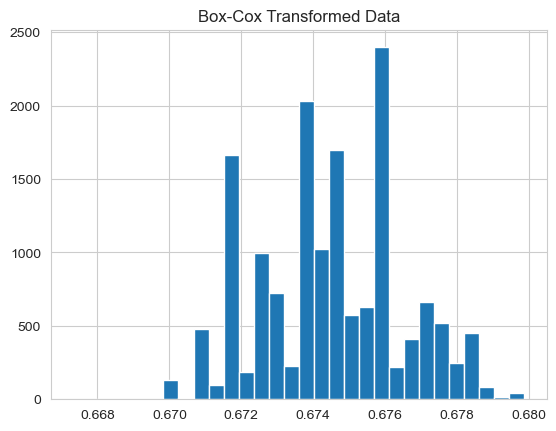

In [15]:
_age_data = sp.stats.boxcox(ds_source['Age'])
plt.hist(_age_data[0], bins=30);
plt.title('Box-Cox Transformed Data')
print("Optimal Lambda", _age_data[1])

---
We will be creating two dataframes, one with the distribution and outlier handling.
This is required for algorithms involvong regression


In [16]:
ds_source_lr = ds_source.copy()
ds_source_lr['Age'] = sp.stats.boxcox(ds_source['Age'])[0]

In [17]:
for column in ['FCVC', 'NCP']:
    ds_source_lr[column] = ds_source_lr[column].round()

In [18]:
ds_labels = ds_source['WeightCategory']
ds_test_ids = ds_test['id']
ds_source.drop(columns=dropable_features, inplace=True)
ds_source_lr.drop(columns=dropable_features, inplace=True)
ds_test.drop(columns=['id'], inplace=True)

(15533, 16)

    ## Outlier

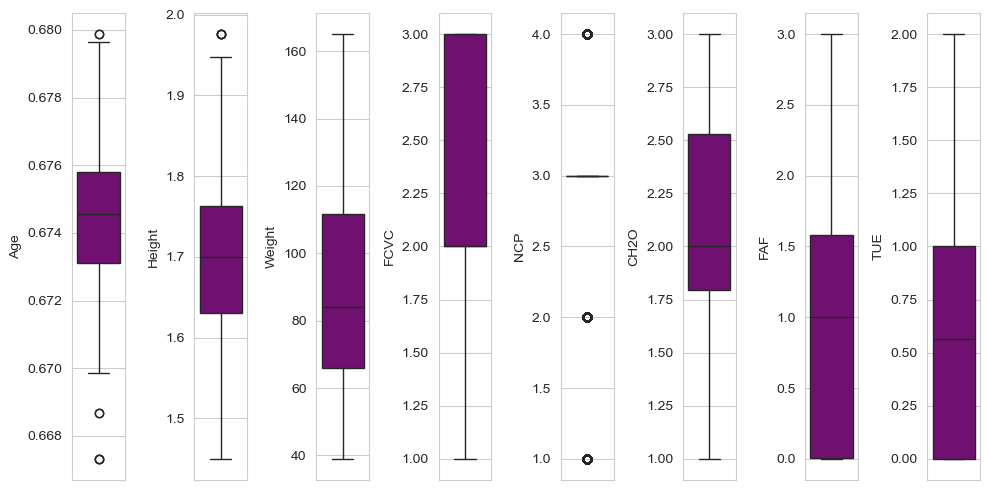

In [19]:
plt.figure(figsize=(10, 5))
for i in range(len(numerical_features)):
    plt.subplot(1, len(numerical_features), i + 1)
    sns.boxplot(y=numerical_features[i], data=ds_source_lr, color='purple')
    plt.tight_layout()

In [20]:
# Count the number of outliers
def count_outliers(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    return ((col < (Q1 - 1.5 * IQR)) | (col > (Q3 + 1.5 * IQR))).sum()


outliers_count = ds_source[numerical_features].apply(count_outliers)
outliers_count

Age        792
Height       4
Weight       0
FCVC         0
NCP       4548
CH2O         0
FAF          0
TUE          0
dtype: int64

In [21]:
# Check if outliers impact mean
for i in numerical_features:
    print(f"Mean of {i} is {ds_source[i].mean().round(2)}")
    print(f"Median of {i} is {ds_source[i].median().round(2)}")
print(" ")

Mean of Age is 23.82
Median of Age is 22.77
Mean of Height is 1.7
Median of Height is 1.7
Mean of Weight is 87.79
Median of Weight is 84.0
Mean of FCVC is 2.44
Median of FCVC is 2.34
Mean of NCP is 2.76
Median of NCP is 3.0
Mean of CH2O is 2.03
Median of CH2O is 2.0
Mean of FAF is 0.98
Median of FAF is 1.0
Mean of TUE is 0.61
Median of TUE is 0.57
 


Processing steps for categoricals

In [22]:
ds_source[multi_cat_features]

,CAEC,CALC,MTRANS
0,Sometimes,Sometimes,Public_Transportation
1,Frequently,no,Automobile
2,Sometimes,no,Public_Transportation
3,Sometimes,Sometimes,Public_Transportation
4,Sometimes,Sometimes,Public_Transportation
...,...,...,...
15528,Frequently,Sometimes,Public_Transportation
15529,Sometimes,Sometimes,Public_Transportation
15530,Sometimes,Sometimes,Public_Transportation
15531,Sometimes,Sometimes,Public_Transportation


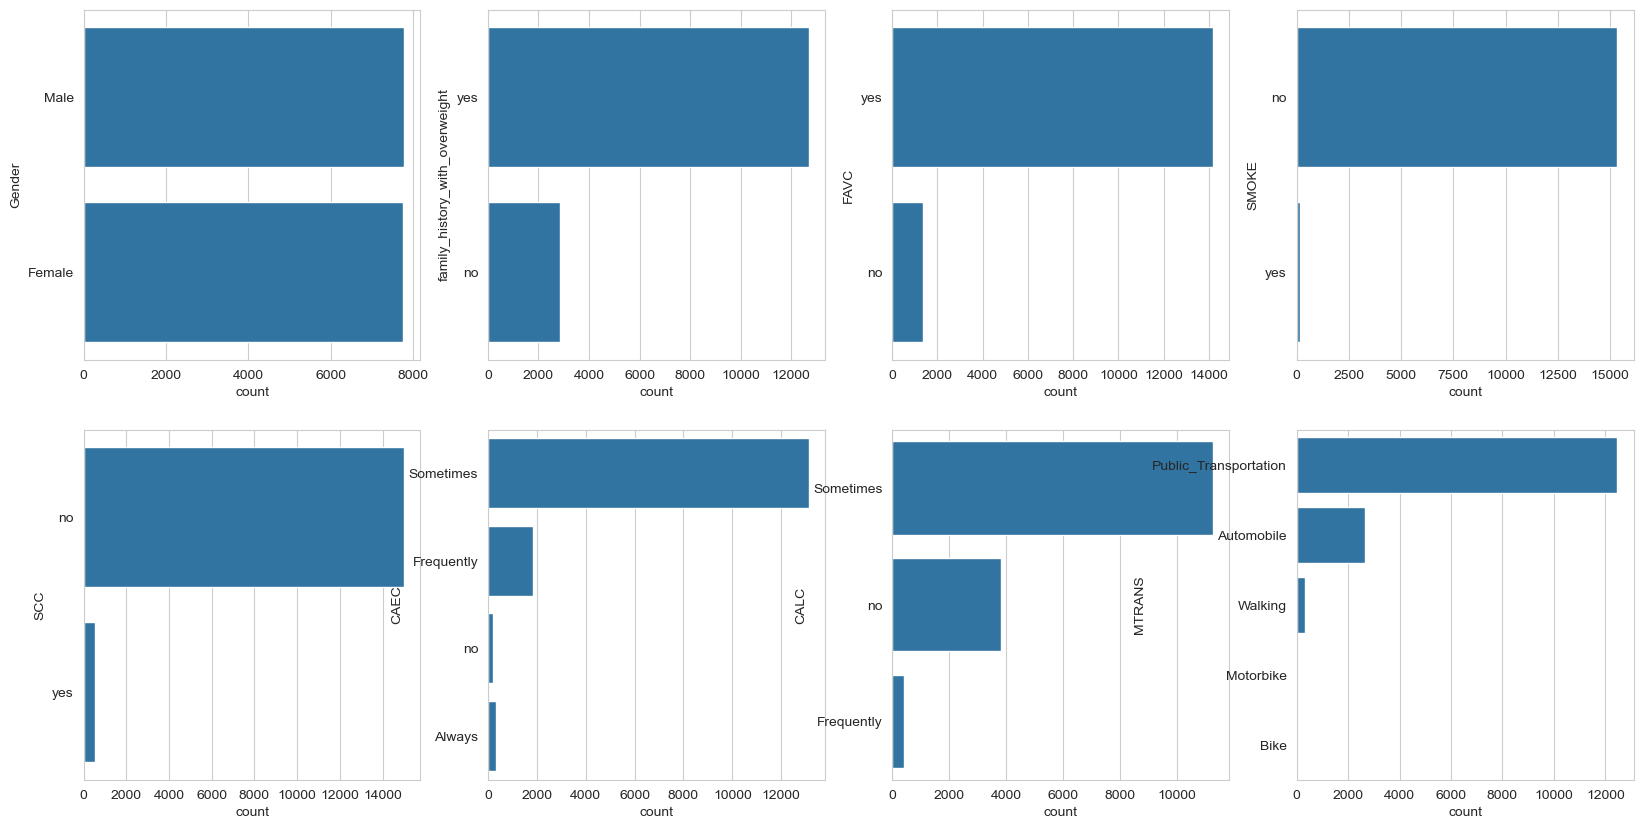

In [23]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
for ax, column in zip(list(axs[0]) + list(axs[1]), binary_features + multi_cat_features):
    sns.countplot(ds_source[column], ax=ax)

In [24]:
ds_source['MTRANS'] = ds_source['MTRANS'].map(lambda x: x if x in ('Public_Transportation', 'Automobile') else 'Others')
ds_test['MTRANS'] = ds_test['MTRANS'].map(lambda x: x if x in ('Public_Transportation', 'Automobile') else 'Others')

In [25]:
pop_drop_columns = ('dropper', 'drop', dropable_features)

In [26]:
pop_stan_scaler = ('stan_scaler', skl.preprocessing.StandardScaler(), numerical_features)

In [27]:
pop_binarizer = ('binarizer', skl.preprocessing.OneHotEncoder(drop='if_binary'), binary_features)

In [28]:
pop_one_hotter = ('one_hotter', skl.preprocessing.OneHotEncoder(), ['MTRANS'])

In [29]:
pop_label_enc = ('label_enc', skl.preprocessing.OrdinalEncoder(), ['CAEC', 'CALC'])

In [30]:
def _pop_derived_features(_ds_in: pd.DataFrame) -> pd.DataFrame:
    _ans = pd.DataFrame()
    _ans["BMI"] = _ds_in["Weight"] / (_ds_in["Height"] ** 2)
    _ans["Water_Intake_per_Meal"] = _ds_in["CH2O"] / (_ds_in["NCP"] + 1e-6)
    _ans["Activity_to_Tech_Ratio"] = _ds_in["FAF"] / (_ds_in["TUE"] + 0.1)
    _ans["Healthy_Lifestyle_Score"] = (_ds_in["FCVC"] * 0.3 + _ds_in["FAF"] * 0.3
                                       + _ds_in["CH2O"] * 0.4 - _ds_in["FAVC"].map({"yes": 1, "no": 0}))
    _ans["Has_FamilyRisk_and_FAVC"] = np.where(
        (_ds_in["family_history_with_overweight"] == "yes") & (_ds_in["FAVC"] == "yes"), 1, 0)
    _ans["Calorie_Monitoring_Interaction"] = (_ds_in["SCC"].map({"yes": 1, "no": 0})
                                              * _ds_in["FAVC"].map({"yes": 1, "no": 0}))
    return _ans


pop_derived_features = ('derived', skl.preprocessing.FunctionTransformer(_pop_derived_features), slice(None))

In [31]:
pop_everything = skl.compose.ColumnTransformer([pop_stan_scaler, pop_derived_features, pop_binarizer, pop_one_hotter])

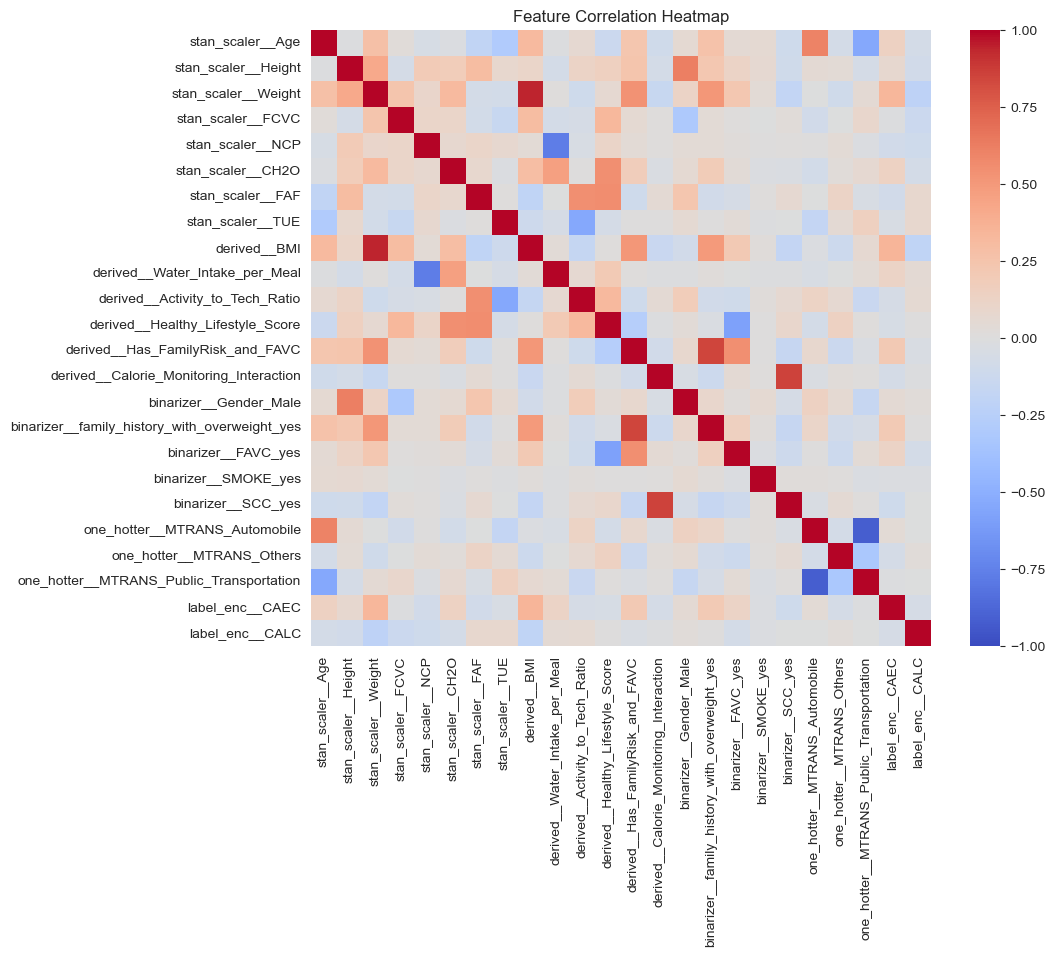

In [70]:
pop_binarizer2 = ('binarizer', skl.preprocessing.OneHotEncoder(drop='if_binary', sparse_output=False), binary_features)
pop_one_hotter2 = ('one_hotter', skl.preprocessing.OneHotEncoder(sparse_output=False), ['MTRANS'])
pop_everything3 = skl.compose.ColumnTransformer(
    [pop_stan_scaler, pop_derived_features, pop_binarizer2, pop_one_hotter2, pop_label_enc])
pop_everything3.set_output(transform='pandas')

ds_source_transf = pop_everything3.fit_transform(ds_source)
corr = ds_source_transf.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False, vmin=-1, vmax=1)
plt.title("Feature Correlation Heatmap")
plt.show()

In [71]:
ds_source_transf.columns.size

24

TVT S

Mdel

In [33]:

pop_everything = skl.compose.ColumnTransformer(
    [pop_stan_scaler, pop_derived_features, pop_binarizer, pop_one_hotter, pop_label_enc])
data_x = pop_everything.fit_transform(ds_source)
data_test = pop_everything.transform(ds_test)
data_y = ds_labels.map(labels_encoder).to_numpy()


In [34]:
x_train, x_test, y_train, y_test = skl.model_selection.train_test_split(data_x, data_y, test_size=0.2, random_state=42)

In [35]:
ds_source.shape

(15533, 16)

In [36]:
data_x.shape

(15533, 24)

In [37]:
data_test.shape

(5225, 24)

In [38]:
ds_test.shape

(5225, 16)

In [43]:
def save_submission(key, model):
    ds_res = pd.DataFrame()
    ds_res['id'] = ds_test_ids
    ds_res['WeightCategory'] = model.predict(data_test)
    ds_res['WeightCategory'] = ds_res['WeightCategory'].map(labels_decoder)
    ds_res.to_csv(f'submission_{key}.csv', index=False)

In [40]:
data_test.shape

(5225, 24)

In [41]:
model = skl.linear_model.LogisticRegression(max_iter=10000)
model.fit(x_train, y_train)
print('Train', model.score(x_train, y_train))
print('Test ', model.score(x_test, y_test))
chime.info()

Train 0.8641558023499115
Test  0.8619246861924686


In [44]:
save_submission('lr', model)

In [33]:
# history = {}
# for penalty, c, solver in itertools.product(
#         [None, 'l1', 'l2', 'elasticnet'],
#         [1.0],
#         ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
# ):
#     key = f'penalty={penalty},c={c},solver={solver}'
#     print("Training", key)
#     try:
#         model = skl.linear_model.LogisticRegression(
#             penalty=penalty, C=c, solver=solver,
#             max_iter=1000, n_jobs=-1)
#         model.fit(data_x, data_y)
#         history[key] = {'model': model, 'score': model.score(data_x, data_y)}
#     except Exception as e:
#         print("Not possible", e)

In [34]:
# history = {}
# for penalty, c, solver in itertools.product(
#         [None, 'l1', 'l2', 'elasticnet'],
#         [1.0],
#         ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
# ):
#     key = f'penalty={penalty},c={c},solver={solver}'
#     print("Training", key)
#     try:
#         model = skl.linear_model.LogisticRegression(
#             penalty=penalty, C=c, solver=solver,
#             max_iter=1000, n_jobs=-1)
#         model.fit(data_x, data_y)
#         history[key] = {'model': model, 'score': model.score(data_x, data_y)}
#     except Exception as e:
#         print("Not possible", e)

In [35]:
model = skl.tree.DecisionTreeClassifier(max_depth=15)
model.fit(x_train, y_train)
model.score(x_train, y_train)
model.score(x_test, y_test)

,criterion,'gini'
,splitter,'best'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [56]:
seed = np.random.randint(0, 100000)
x_train, x_test, y_train, y_test = skl.model_selection.train_test_split(data_x, data_y, test_size=0.2,
                                                                        random_state=seed)
print('seed', seed)
model = skl.tree.DecisionTreeClassifier(max_depth=10)
model.fit(x_train, y_train)
print('Train', model.score(x_train, y_train))
print('Test ', model.score(x_test, y_test))
save_submission('DT', model)

seed 16462
Train 0.9122002253339772
Test  0.8738332796910203


In [222]:
model = skl.ensemble.AdaBoostClassifier()
model.fit(x_train, y_train)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.7741831643328505
0.7698744769874477


In [232]:
model = skl.ensemble.AdaBoostClassifier(n_estimators=100, learning_rate=0.7)
model.fit(x_train, y_train)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.7995332367616288
0.8023817186997103


In [233]:
model = skl.ensemble.RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

1.0
0.8934663662697135


In [45]:
model = skl.ensemble.RandomForestClassifier(n_estimators=100, max_depth=10)
model.fit(x_train, y_train)
print('Train', model.score(x_train, y_train))
print('Test ', model.score(x_test, y_test))
save_submission('RF_100estim_10depth', model)

Train 0.9336069531627234
Test  0.8950756356614097


In [56]:
model = skl.ensemble.RandomForestClassifier(n_jobs=-1, random_state=16462)
gs_model = skl.model_selection.GridSearchCV(model, {
    'n_estimators': range(50, 150, 10),
    'max_depth': range(5, 15),
})
gs_model.fit(x_train, y_train)
print('Params', gs_model.best_params_)
print('Train ', gs_model.score(x_train, y_train))
print('Test  ', gs_model.score(x_test, y_test))
save_submission('GS_RF', gs_model)
chime.success()

In [77]:
model = skl.ensemble.RandomForestClassifier(n_jobs=-1, random_state=16462)
gs_model = skl.model_selection.GridSearchCV(model, {
    'n_estimators': range(60, 100, 1),
    'max_depth': range(10, 15),
})
gs_model.fit(x_train, y_train)
print('Params', gs_model.best_params_)
print('Train ', gs_model.score(x_train, y_train))
print('Test  ', gs_model.score(x_test, y_test))
save_submission('GS_RF', gs_model)
chime.success()

Params {'max_depth': 12, 'n_estimators': 80}
Train  0.956623209399646
Test   0.8966849050531059


In [75]:
# model = skl.ensemble.RandomForestClassifier(class_weight="balanced", n_jobs=-1, random_state=16462)
# rfecv = skl.feature_selection.RFECV(estimator=model, step=1, cv=skl.model_selection.StratifiedKFold(10))
# pipeline = skl.pipeline.Pipeline([('feature_selection', rfecv), ('classification', model)])
# gs_model = skl.model_selection.GridSearchCV(pipeline, {
#     'classification__n_estimators': range(60, 100, 2),
#     'classification__max_depth': range(10, 15),
# }, n_jobs=-1, verbose=2)
# gs_model.fit(x_train, y_train)
# print('Params', gs_model.best_params_)
# print('Train ', gs_model.score(x_train, y_train))
# print('Test  ', gs_model.score(x_test, y_test))
# save_submission('GS_FE_RF', gs_model)
# chime.success()

KeyboardInterrupt: 

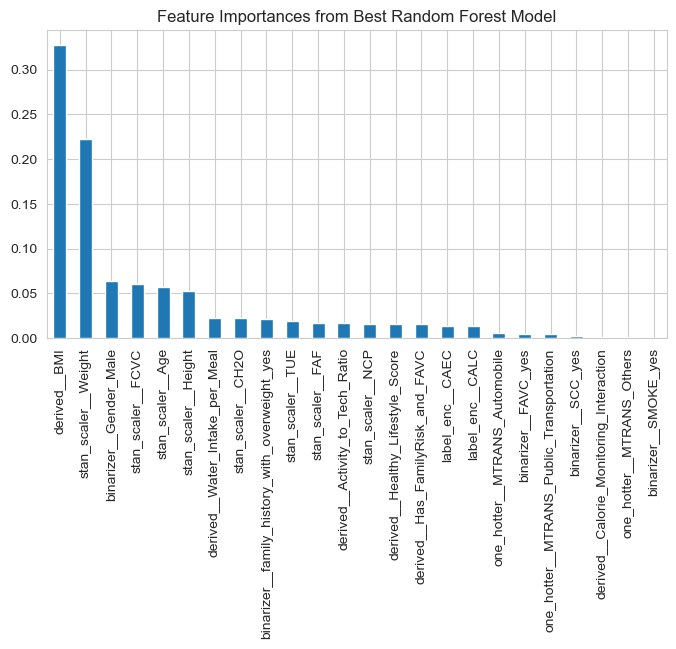

In [72]:
pd.Series(gs_model.best_estimator_.feature_importances_, index=ds_source_transf.columns).sort_values(
    ascending=False).plot(kind='bar', figsize=(8, 4))
plt.title("Feature Importances from Best Random Forest Model")
plt.show()

In [ ]:
gs_model.best_params_

In [80]:
seed = np.random.randint(0, 10000)
print('seed', seed)
dt_model = skl.tree.DecisionTreeClassifier(random_state=seed)
ada_model = skl.ensemble.AdaBoostClassifier(estimator=dt_model, random_state=seed)
gs_model = skl.model_selection.GridSearchCV(estimator=ada_model, param_grid={
    'n_estimators': range(245, 255),
    'estimator__max_depth': [9, 10, 11]
}, scoring='accuracy', cv=5, n_jobs=14, verbose=2)
gs_model.fit(x_train, y_train)
print('Params', gs_model.best_params_)
print('Train ', gs_model.score(x_train, y_train))
print('Test  ', gs_model.score(x_test, y_test))
save_submission('GS_ADA', gs_model)
chime.success()

seed 7204
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Params {'estimator__max_depth': 10, 'learning_rate': 1, 'n_estimators': 250}
Train  1.0
Test   0.8921789507563566


In [88]:
len(ds_labels.unique())

7

In [94]:
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',  # or 'multi:softprob'
    num_class=len(ds_labels.unique()),
    eval_metric='mlogloss',
    # use_label_encoder=False,
    random_state=seed
)
param_grid = {
    'n_estimators': [204],
    'max_depth': [4],
    'learning_rate': [0.1],
    'subsample': [0.64, 0.65, .66],
    'colsample_bytree': [.75, .76]
}
gs_model = skl.model_selection.GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy',
                                            cv=3, n_jobs=14, verbose=3)
gs_model.fit(x_train, y_train)
print('Params', gs_model.best_params_)
print('Train ', gs_model.score(x_train, y_train))
print('Test  ', gs_model.score(x_test, y_test))
save_submission('GS_XGB', gs_model)
chime.success()

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Params {'colsample_bytree': 0.75, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 204, 'subsample': 0.65}
Train  0.9490584258812168
Test   0.8979723205664628


In [96]:
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',  # or 'multi:softprob'
    num_class=len(ds_labels.unique()),
    eval_metric='mlogloss',
    # use_label_encoder=False,
    random_state=seed
)
param_grid = {
    'n_estimators': [200],
    'max_depth': [3],
    'learning_rate': [0.1],
    'subsample': [.8],
    'colsample_bytree': [.8]
}
gs_model = skl.model_selection.GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy',
                                            cv=3, n_jobs=14, verbose=3)
gs_model.fit(x_train, y_train)
print('Params', gs_model.best_params_)
print('Train ', gs_model.score(x_train, y_train))
print('Test  ', gs_model.score(x_test, y_test))
save_submission('GS_XGB', gs_model)
chime.success()

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Params {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Train  0.9278931273136971
Test   0.895397489539749


In [134]:
seed = np.random.randint(0, 10000)
print('seed', seed)
x_train, x_test, y_train, y_test = skl.model_selection.train_test_split(data_x, data_y, test_size=0.2,
                                                                        random_state=seed)
dists = []
for i in range(data_test.shape[0]):
    # dists.append(((data_test[i] - x_train) ** 2).sum(axis=1).argmin())
    indices = ((data_test[i] - x_train) ** 2).sum(axis=1).argsort()[:2]
    dists.append(indices[0])
    dists.append(indices[1])
print((((data_test - x_train[dists[::2]]) ** 2).sum(axis=1) ** 0.5).mean())

seed 797
1.1538748510714392


In [137]:
seed = 1745
print('seed', seed)
dt_model = skl.tree.DecisionTreeClassifier(random_state=seed, max_depth=10)
ada_model = skl.ensemble.AdaBoostClassifier(estimator=dt_model, random_state=seed, n_estimators=250)
ada_model.fit(x_train[dists], y_train[dists])
print('Params', gs_model.best_params_)
print('Train ', gs_model.score(x_train, y_train))
print('Test  ', gs_model.score(x_test, y_test))
save_submission('CH_ADA', gs_model)
chime.success()

seed 1745
Params {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Train  0.9197650088524062
Test   0.9279047312520116


In [136]:
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',  # or 'multi:softprob'
    num_class=len(ds_labels.unique()),
    eval_metric='mlogloss',
    # use_label_encoder=False,
    random_state=seed,
    n_estimators=200,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
)
xgb_model.fit(x_train[dists], y_train[dists])
print('Train ', xgb_model.score(x_train, y_train))
print('Test  ', xgb_model.score(x_test, y_test))
save_submission('CH_XGB', xgb_model)
chime.success()

Train  0.9125221310156124
Test   0.9079497907949791
